<div style = "font-size: 30px; text-align: center;background-color: #36454F; padding: 10px;color:white;">
<br><strong>Data Analysis & Visualisation</strong><br><br></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data_clean.csv")

<div style = "font-size: 20px; text-align: center;background-color: #36454F; padding: 10px;color:white;">
<strong>Enhancing Customer Experience</strong></div>

<div style = "font-size: 16px; font-weight:bold;background-color: #71797E; padding: 10px;color:white;">
Insight 1:
<br>
Communication/Marketing channel consent analysis
</div>

  channel   yes     no
0    mail  5768  12224
1   email  6905  11087
2    call  2165  15827
3     sms  4578  13414


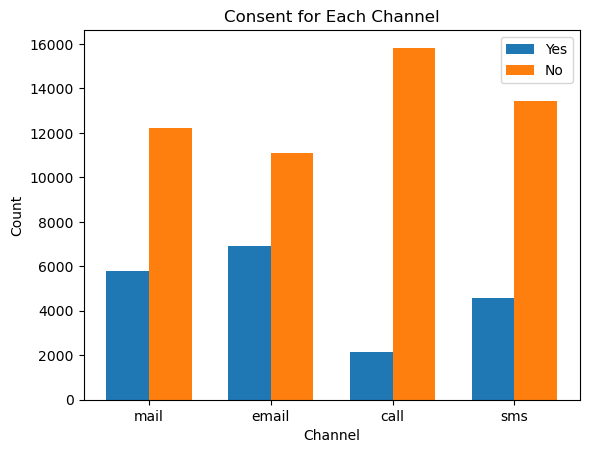

In [2]:
#Identify customers who have not provided consent across multiple
#communication channels. Enhance engagement by ensuring that communication
#aligns with individual preferences. Use is_consent_to_mail, is_consent_to_email etc.

consent_mail_count = data['is_consent_to_mail'].value_counts()
consent_email_count = data['is_consent_to_email'].value_counts()
consent_call_count = data['is_consent_to_call'].value_counts()
consent_sms_count = data['is_consent_to_sms'].value_counts()

df_mail = pd.DataFrame({'channel':'mail','yes':consent_mail_count.get(1,0),'no':consent_mail_count.get(0,1)},index=[0])
df_email = pd.DataFrame({'channel':'email','yes':consent_email_count.get(1,0),'no':consent_email_count.get(0,1)},index=[1])
df_call = pd.DataFrame({'channel':'call','yes':consent_call_count.get(1,0),'no':consent_call_count.get(0,1)},index=[2])
df_sms = pd.DataFrame({'channel':'sms','yes':consent_sms_count.get(1,0),'no':consent_sms_count.get(0,1)},index=[3])

consent_table = pd.concat([df_mail,df_email,df_call,df_sms])
print(consent_table)

fig, ax = plt.subplots()

bar_width=0.35
bar_positions=range(len(consent_table['channel']))

plt.bar(bar_positions,consent_table['yes'],bar_width,label='Yes')
plt.bar([pos + bar_width for pos in bar_positions],consent_table['no'],bar_width,label="No")

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title("Consent for Each Channel")
plt.xticks([pos + bar_width/2 for pos in bar_positions],consent_table['channel'])
plt.legend()

plt.show()

<div style = "font-size: 16px;">
Based on the analysis above, is it clearly reflected that a significant number of customers are not providing consent across all channels. This suggests that there is a need to improve and personalise the customer experience in a way that may change their consent preferences.
<br>
<br>
Even though the majority of the customers do not provide consent across all channels, the channel email and mail seem to have a slightly better ratio compared to calls and sms. This may provide an opportunity for personalised consent campaigns or even educational contents.</div>

<div style = "font-size: 16px; font-weight:bold;background-color: #71797E; padding: 10px;color:white;">
Insight 2:
<br>
Analysis of challenges faced by various demographic segments
</div>

In [3]:
#Insight 2:
#Identify specific demographics segments facing challenges in the application
#process. Tailor the application journey by providing the support and
#incentives for each segments. E.g. housewife retiree, sg pr, hh size, annual
#income est

<div style = "font-size: 16px;font-weight:bold">
Residency Status Analysis
</div>


Residency status can have influence on insurance policies such as the premium rates, policy eligibility, coverage availability and many other aspects.

To enhance customer experience, there can be customisation of the customer support depending on the customer's residency status. For instance, providing a localised customer support through personalised communication. The support can be catered to suit the specific needs and regulations in different regions with the availability of multiple languages. The targeted messages, offers, and information shared with the customers can also be personalised based on the customer's geographic location to ensure relevance of information.

Residency status of customers
   sg_pr  non_sg_pr
0  16522       1470


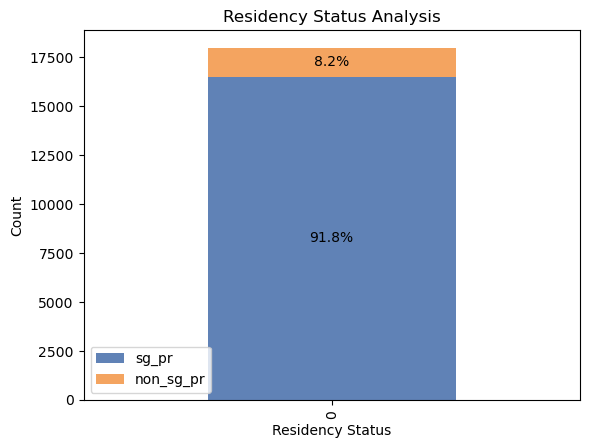

In [4]:
#is_sg_pr column:
print()
print("Residency status can have influence on insurance policies such as the premium rates, policy eligibility, coverage availability and many other aspects.")
print()
print("To enhance customer experience, there can be customisation of the customer support depending on the customer's residency status. For instance, providing a localised customer support through personalised communication. The support can be catered to suit the specific needs and regulations in different regions with the availability of multiple languages. The targeted messages, offers, and information shared with the customers can also be personalised based on the customer's geographic location to ensure relevance of information.")
print()
print("Residency status of customers")
residency_count = data['is_sg_pr'].value_counts()

residency_table = pd.DataFrame({
    'sg_pr':residency_count.get(1,0),
    'non_sg_pr':residency_count.get(0,0)
},index=[0])
print(residency_table)

ax=residency_table.plot(kind='bar',stacked=True,color=['#6082B6','#F4A460'])
for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    percentage=height/residency_table.sum(axis=1).values[0]*100
    ax.annotate(f'{percentage:.1f}%',(x+width/2,y+height/2),
               ha='center',va='center',color='black')

plt.xlabel('Residency Status')
plt.ylabel('Count')
plt.title('Residency Status Analysis')
plt.show()

<div style = "font-size: 16px;">
Majority of the customer are Singaporean Citizens or Permanent Residents in Singapore. To target the majority of the customers, there can be exclusive offers and benefits provided to SG/PR customers to show appreciation to their local loyalty. For Non-SG/PR customers, there can be welcome programs with multilingual support to ensure that the needs of the customers are properly fulfilled. There can also be a global customer support system in consideration of customers residing outside Singapore at different time zones.</div>

<div style = "font-size: 16px;font-weight:bold">
Household Size Analysis
</div>


Using the household size analysis, policies can be tailored to the specific needs of the different households. For instance, there can be family plans for larger households.

  Household Size  Count
5              0     90
4              1    993
3              2   2688
0              3   7257
1              4   3813
2             >4   3151


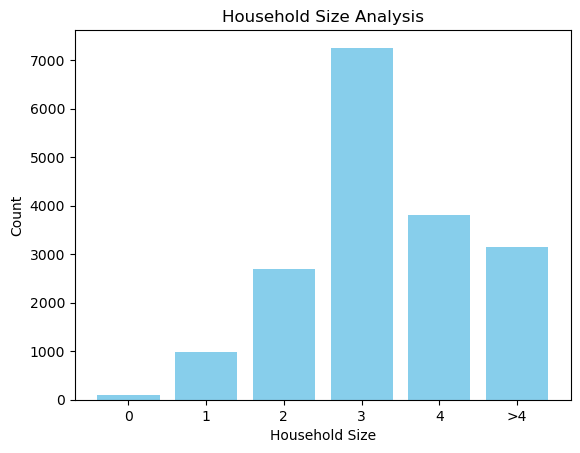

In [5]:
#hh_size_est column:
print()
print("Using the household size analysis, policies can be tailored to the specific needs of the different households. For instance, there can be family plans for larger households.")
print()
hh_size_count = data['hh_size_est'].value_counts()
hh_size_table = hh_size_count.reset_index()
hh_size_table.columns = ['Household Size','Count']
hh_size_table = hh_size_table.sort_values(by='Household Size')
print(hh_size_table)

plt.bar(hh_size_table['Household Size'],hh_size_table['Count'],color='skyblue')

plt.xlabel('Household Size')
plt.ylabel('Count')
plt.title('Household Size Analysis')

plt.show()

<div style = "font-size: 16px;">
The customers' household sizes are mostly 3 and above. The mode household size is 3. To target the majority of the customers, there can be customised policy bundles cater specifically to families of three. There can be family exclusive events or family loyalty programs as well.</div>

<div style = "font-size: 16px;font-weight:bold">
Occupation Classification Analysis
</div>


In insurance policies, policies can be classified into groups as shown below:


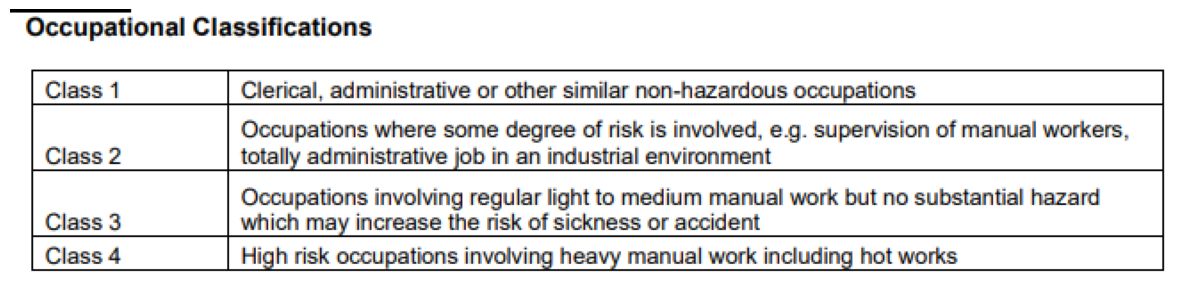

The above occupation classficiation table is adapted from Singlife Group Insurance Fact-Find Form.

   class 1 & 2  class 3 & 4
0         9586         8406


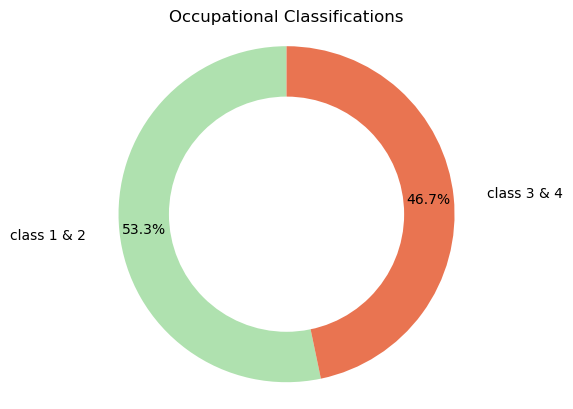

In [6]:
#is_class_1_2 column:
print()
print("In insurance policies, policies can be classified into groups as shown below:")
occupation_classes = plt.imread("occupation classes.png")

fig,ax=plt.subplots(figsize=(15,15))
ax.imshow(occupation_classes)
ax.axis('off')
plt.show()

print("The above occupation classficiation table is adapted from Singlife Group Insurance Fact-Find Form.")
print()
class_counts = data['is_class_1_2'].value_counts()
class_table = pd.DataFrame({
    'class 1 & 2':class_counts.get(1,0),
    'class 3 & 4':class_counts.get(0,0)
},index=[0])
print(class_table)

fig,ax=plt.subplots()
ax.pie(class_table.iloc[0],labels=class_table.columns,autopct='%1.1f%%',startangle=90,colors=['#AFE1AF','#E97451'],labeldistance=1.2,pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc="white")
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')

plt.title('Occupational Classifications')
plt.show()

<div style = "font-size: 16px;">
Slightly more than half of the customers' occupation classification fall in class 1 and 2. This means that most of their occupations' exposure to high level of risks is very low. This portion of customers will hence may not prioritise the need for health insurance policies. To encourage this portion of customers to continue their investment in insurance coverage, a more comprehensive coverage can be introduced so that protection can be beyond just work-related risks. This may motivate customers to get their insurance even if their occupation has low risks.</div>

<div style = "font-size: 20px; text-align: center;background-color: #36454F; padding: 10px;color:white;">
<strong>Critical Touchpoints contributing to Customer Dropoffs</strong></div>

  stat_flag  count
0    ACTIVE  17205
1    LAPSED    775
2   MATURED     12


Text(0.5, 1.0, 'Customer Flag Status')

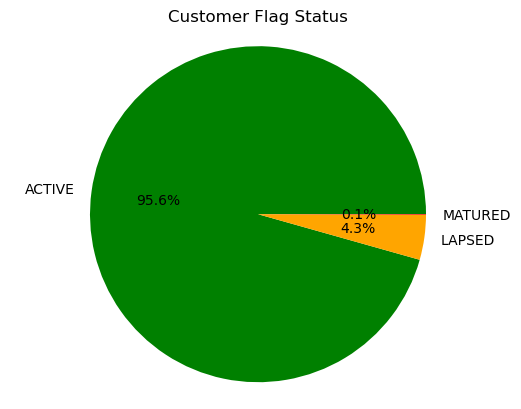

In [7]:
#Calculate customer dropoff rate and ratio of active vs inactive customers before breakdown of
#critical touchpoints contributing to the dropoff

flagstatus_count = data['stat_flag'].value_counts()
df_flagstatus_count = flagstatus_count.reset_index()
df_flagstatus_count.columns = ['stat_flag','count']
print(df_flagstatus_count)

labels = df_flagstatus_count['stat_flag']
values = df_flagstatus_count['count']
text_props = {'fontsize':10}
colors = ['green','orange','red']
plt.pie(values,labels=labels, autopct='%1.1f%%', textprops=text_props, colors=colors)
plt.axis('equal')
plt.title('Customer Flag Status')

<div style = "font-size: 16px;">
The customer dropoff rate is approximately 5%.The majority of dropoff cases are linked to customers whose policies have lapsed, rather than policies reaching maturity. </div>

<div style = "font-size: 18px;font-weight:bold;background-color: #71797E; padding: 10px;color:white;">
Factors contributing to policies being lapsed:</div>

<div style = "font-size: 16px;background-color: #C0C0C0; padding: 10px;color:black">
Factor 1: 
<br>
Customers' insurance policy may be lapsed if there are non-payment of premiums, insufficient funds, expired grace period and many other reasons. These issues may arise if the customer is uncontactable due to invalid contact information.</div>

dm validity count
   valid  invalid
0  12855     5137

email validity count
   valid  invalid
0  13388     4604


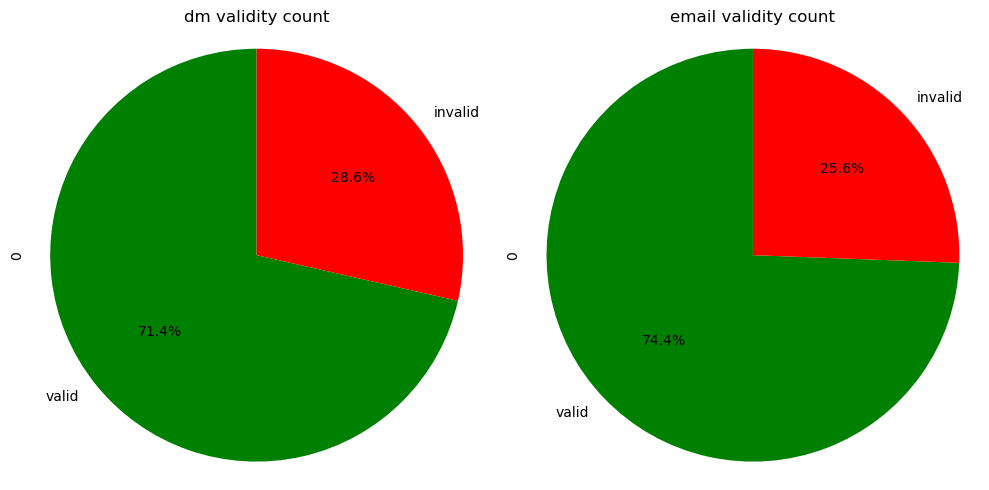

In [8]:
#Critical Touchpoint 1:
#Analyse the flags is_valid_dm and is_valid_email to assess validity of
#direct communication with customers. If contact information is not updated,
#clients may not be reached successfully.

valid_dm_counts = data['is_valid_dm'].value_counts()
valid_email_counts = data['is_valid_email'].value_counts()

valid_dm_df = pd.DataFrame({'valid':valid_dm_counts[1],'invalid':valid_dm_counts[0]},index=[0])
valid_email_df = pd.DataFrame({'valid':valid_email_counts[1],'invalid':valid_email_counts[0]},index=[0])
print('dm validity count')
print(valid_dm_df)
print()
print('email validity count')
print(valid_email_df)

fig,axes=plt.subplots(1,2,figsize=(10,5))

valid_dm_df.iloc[0].plot.pie(ax=axes[0],labels=valid_dm_df.columns,autopct='%1.1f%%',startangle=90,colors=['green','red'])
axes[0].axis('equal')
axes[0].set_title('dm validity count')

valid_email_df.iloc[0].plot.pie(ax=axes[1],labels=valid_email_df.columns,autopct='%1.1f%%',startangle=90,colors=['green','red'])
axes[1].axis('equal')
axes[1].set_title('email validity count')

plt.tight_layout()
plt.show()

<div style = "font-size: 16px;">
The information from the pie charts indicates that at least 1/4 of the customers' information for both DM and email channels are invalid. This issue might contribute to policies being lapsed and consequently, contribute to customer drop-offs largely due to a communication breakdown. With an invalid contact information, Singlife will not be able to contact its policyholders. If Singlife is unable to reach its customers to communicate important information, such as policy updates or payments, the customer's policy may be lapsed.</div>

<div style = "font-size: 16px;background-color: #C0C0C0; padding: 10px;color:black">
Factor 2: 
<br>
</div>

annual_income_est
A.ABOVE200K    2453
B.100K-200K     869
C.60K-100K     3188
D.30K-60K      2291
E.BELOW30K     9191
Name: count, dtype: int64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'A.ABOVE200K'),
  Text(1, 0, 'B.100K-200K'),
  Text(2, 0, 'C.60K-100K'),
  Text(3, 0, 'D.30K-60K'),
  Text(4, 0, 'E.BELOW30K')])

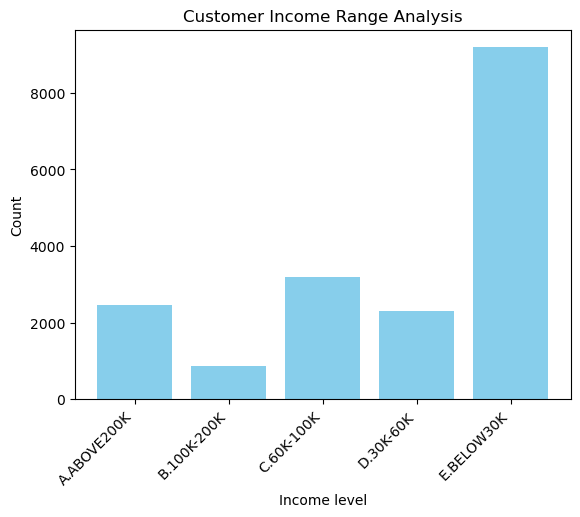

In [9]:
#Critical Touchpoint 2:
#Analyse income level of customers

income_lvl_counts = data['annual_income_est'].value_counts().sort_index()
print(income_lvl_counts)

plt.bar(income_lvl_counts.index,income_lvl_counts.values,color="skyblue")

plt.xlabel("Income level")
plt.ylabel("Count")
plt.title("Customer Income Range Analysis")

plt.xticks(rotation=45,ha='right')


<div style = "font-size: 16px;">
Majority of the customers have an annual income level of below 30k. This may be a major factor that contributes to customer dropoffs. If customers are unable to invest in insurance packages, they may choose to cancel the existing policies that they hold. To target this lower-income range of customers, Singlife can provide alternative cheaper policy packages</div>

<div style = "font-size: 20px; text-align: center;background-color: #36454F; padding: 10px;color:white;">
<strong>Opportunities to streamline Application Process and Personalise Communication</strong></div>

<div style = "font-size: 16px;">
We have concluded that we wanted to personalise emails and mails into our model as we saw that there is a significant number of customers that agreed to allow us to connect with them through those platforms as compared to the very low numbers of people who agreed to be called by Singlife regarding their insurance plan. Firstly, we looked into another part of the data and found out that more than 50% of the clientele are in a household with 3 or more occupants. Secondly, we dug out more data to find out the household income earned per year and found out that a large majority of our clientele belonged in the category that earned less than 30K SGD per annum. Thirdly, we looked into the job classifications of our clientele and found out that more than 50% of our clientele are in classes 1 and 2 which are the lower-risk jobs. This shows that our clientele is almost evenly divided between the lower-risk and higher-risk jobs. Lastly, we found that more than 90% of our clientele are Singaporeans or permanent residents. We chose to go through these datas that we have gathered so as to understand our clientele further so that we are able to come up with a solution as to how we could increase the customers’ satisfaction with Singlife. Additionally, we also gathered some data on understanding a certain proportion of Singlife’s clientele that reflects ‘lapsed’ or ‘matured’ status. Around 4.5% to 5% of Singlife’s clientele had a ‘lapsed’ status. Taking all these into account, we conducted a predictive analysis into the columns and components and did a run as to what was the best solution that we could implement so that we are able to increase our customer’s satisfaction.
<br><br>
Thus, our group chose to run an accuracy model which had a 92% accuracy. We chose to build an accuracy model because we realised that after dealing with the accuracy model, the percentage of false negatives and false positives are rather low which then deems that the accuracy model is a good first step to what we would like to create further. We would also like to concede that although an accuracy model serves to be a viable choice at this current juncture, there could have been more models that we could have implemented if time permits us. We would have definitely loved to explore recall, precision and F1-score based models to approach these data that we have gathered so that we could ensure that our predictive analysis has more substantial evidence. 
<br><br>
In conclusion, we planned to use the accuracy model to predict who would stay with Singlife and who would leave after their insurance has matured. In other words, we planned to retain as many customers as possible and that our goal is to build a long-lasting business deal with our customers which could only be done with attractive packages that entices them enough. Firstly, understanding that more than half of our clientele are in a household with more than 3 occupants, we can conclude that they are a family living home and our packages can be shaped in a way where we could include more family insurance incentives for our customers. Secondly, since a large majority of our clientele earns less than 30K SGD per annum in each household, we could create attractive insurance packages that are not too costly so that they are not burdened to continue with Singlife. Thirdly, acknowledging that almost half of our clientele are in higher-risk jobs, we can invest more into our accident plans so that we are able to retain our customers through such plans. Lastly, we could offer a premium discount for the first 3 months to Singaporeans and Permanent Residents as we are well aware that a very large proportion of our clientele are Singaporeans and permanent residents. Ergo, we decided that our accuracy model would be a good first step in communicating with other stakeholders about the certain key indicators we can already look through to enhance our customers’ experience and satisfaction which will lead us to being able to retain our customers.</div>